In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")

2025-05-08 20:45:14,731 - data_processing.data_preprocessing - INFO - Applied one-hot encoding to ['surface', 'tourney_level', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand']
2025-05-08 20:45:15,269 - data_processing.data_preprocessing - INFO - Columns successfully dropped -> ['tourney_name', 'tourney_id', 'match_num', 'winner_name', 'loser_name', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'Unnamed: 0', 'loser_entry_S']
2025-05-08 20:45:15,327 - data_processing.data_preprocessing - INFO - 89263 rows dropped
2025-05-08 20:45:15,787 - utils.dataframe - INFO - 52763 winners assigned to player 1
2025-05-08 20:45:15,787 - utils.dataframe - INFO - 52970 winners assigned to player 2
2025-05-08 20:45:16,102 - data_processing.feature_engineering - INFO - Applying feature engineering


In [2]:
columns_to_remove = [
    "tourney_level_O", "player_1_entry_ITF", "player_1_entry_UP",
    "player_1_entry_W", "player_2_entry_ITF", "player_2_entry_UP",
    "player_2_entry_W"
]
df = df.drop(columns=[column for column in columns_to_remove])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105733 entries, 0 to 105538
Data columns (total 97 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   player_1_id                    105733 non-null  int64  
 1   player_1_seed                  105733 non-null  float64
 2   player_1_ht                    105733 non-null  float64
 3   player_1_ioc                   105733 non-null  int64  
 4   player_1_age                   105733 non-null  float64
 5   player_1_rank                  105733 non-null  float64
 6   player_1_rank_points           105733 non-null  float64
 7   player_1_entry_ALT             105733 non-null  bool   
 8   player_1_entry_Alt             105733 non-null  bool   
 9   player_1_entry_LL              105733 non-null  bool   
 10  player_1_entry_PR              105733 non-null  bool   
 11  player_1_entry_Q               105733 non-null  bool   
 12  player_1_entry_SE              1057

In [4]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [5]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, shuffle=False)

In [6]:
x_train.tail()

player_1_id  player_1_seed  player_1_ht  player_1_ioc  player_1_age  \
102554       209414       0.500000        178.0            10          19.5   
102555       209414       0.500000        178.0            10          19.5   
102556       210506       0.250000        193.0             2          19.2   
102557       210506       0.250000        193.0             2          19.2   
102558       209098       0.166667        188.0            62          20.3   

        player_1_rank  player_1_rank_points  player_1_entry_ALT  \
102554       0.014286                 756.0               False   
102555       0.014286                 756.0               False   
102556       0.010309                 653.0               False   
102557       0.010309                 653.0               False   
102558       0.009091                 582.0               False   

        player_1_entry_Alt  player_1_entry_LL  ...  player_2_surface_elo  \
102554               False              False  ...           1549.903099   
102555               False              False  ...           1495.612704   
102556               False              False  ...           1559.523235   
102557               False              False  ...           1482.745252   
102558               False              False  ...           1494.512609   

        surface_elo_diff  player_1_last_5_elo_progress  \
102554        -69.829444                      1.010829   
102555        -25.159184                      1.026159   
102556        -74.033554                      1.020317   
102557         -6.736554                      1.002515   
102558         74.491608                      1.019492   

        player_2_last_5_elo_progress  player_1_last_10_elo_progress  \
102554                      1.022884                       0.995764   
102555                      0.975341                       1.011584   
102556                      1.024227                       1.035821   
102557                      0.992612                       1.015457   
102558                      0.991860                       1.044458   

        player_2_last_10_elo_progress  player_1_last_20_elo_progress  \
102554                       1.050321                       1.006772   
102555                       0.976055                       1.019255   
102556                       1.047485                       1.036482   
102557                       0.985891                       1.027576   
102558                       0.978777                       1.052121   

        player_2_last_20_elo_progress  player_1_last_50_elo_progress  \
102554                       1.026071                       1.010158   
102555                       0.976055                       1.019063   
102556                       1.035852                       1.036482   
102557                       0.985891                       1.027576   
102558                       0.978777                       1.043273   

        player_2_last_50_elo_progress  
102554                       1.026071  
102555                       0.976055  
102556                       1.035852  
102557                       0.985891  
102558                       0.978777  

[5 rows x 96 columns]

array([[<Axes: title={'center': 'player_1_id'}>,
        <Axes: title={'center': 'player_1_seed'}>,
        <Axes: title={'center': 'player_1_ht'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_1_age'}>,
        <Axes: title={'center': 'player_1_rank'}>,
        <Axes: title={'center': 'player_1_rank_points'}>,
        <Axes: title={'center': 'player_2_id'}>],
       [<Axes: title={'center': 'player_2_seed'}>,
        <Axes: title={'center': 'player_2_ht'}>,
        <Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'player_2_age'}>,
        <Axes: title={'center': 'player_2_rank'}>,
        <Axes: title={'center': 'player_2_rank_points'}>,
        <Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>],
       [<Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_

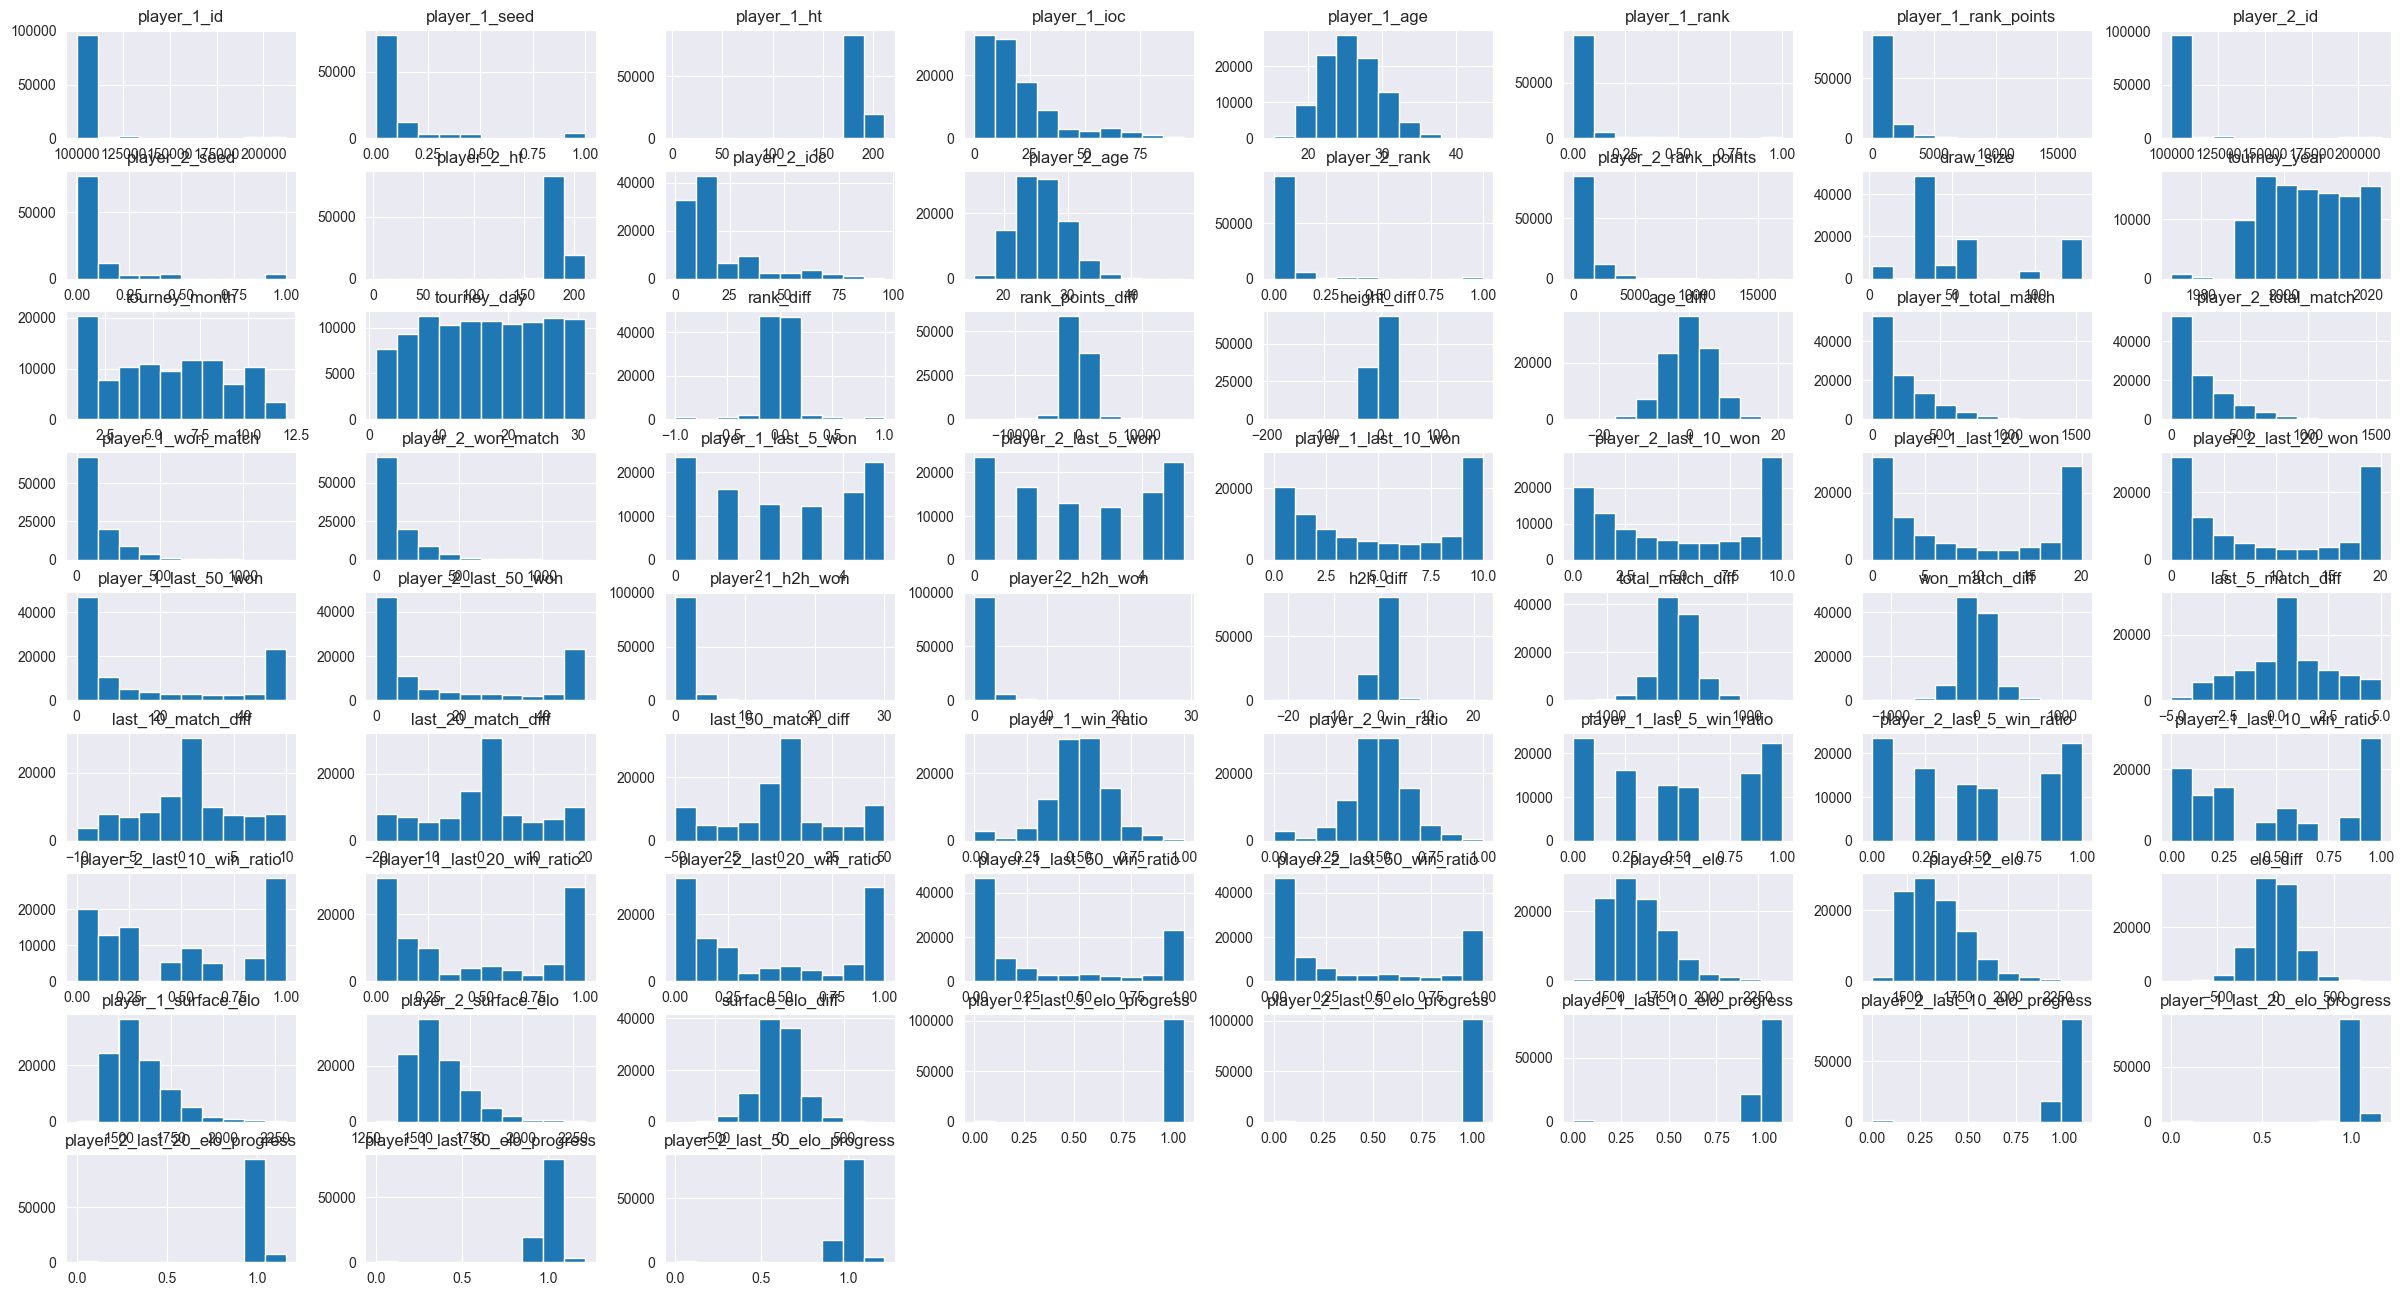

In [7]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(30, 16))

<Axes: >

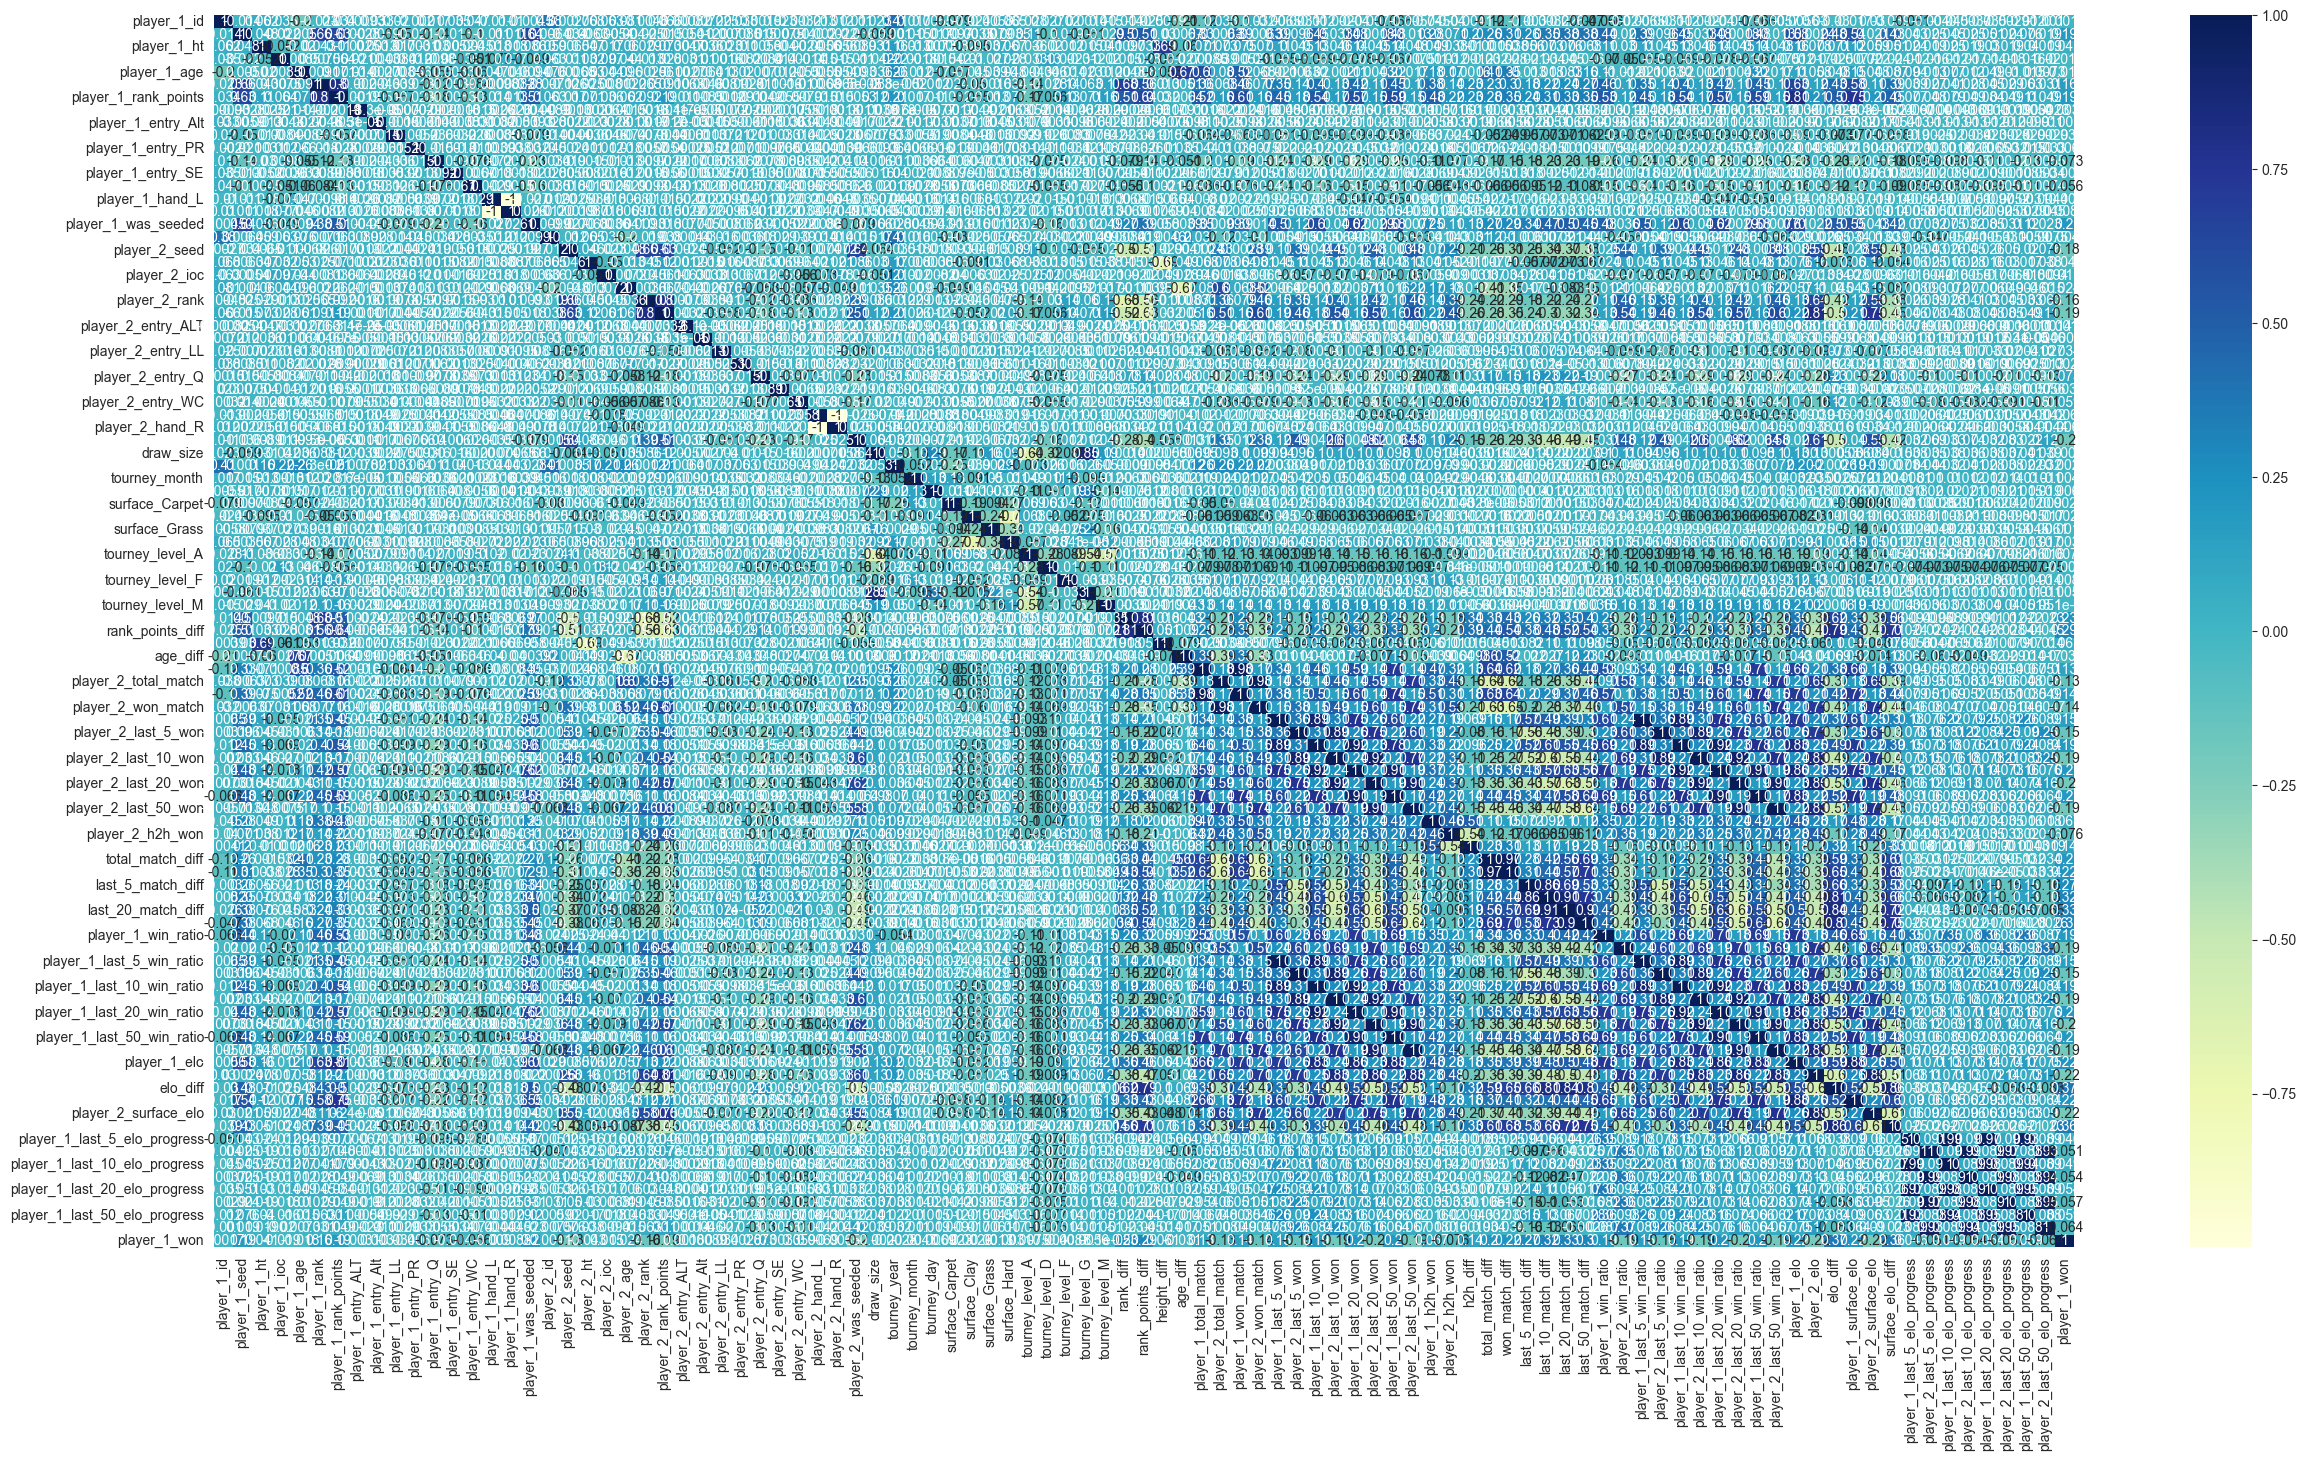

In [8]:
plt.figure(figsize=(30, 16))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
accuracy = forest.score(x_test, y_test)
print(f"Random Forest Model Accuracy -> {accuracy *100}%")

Random Forest Model Accuracy -> 65.36666666666666%


In [11]:
importances = forest.feature_importances_
feature_names = x.columns
importance_list = [[feature, importance] for feature, importance in
                   zip(feature_names, importances)]

importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance * 100}%")

surface_elo_diff: 4.265401531045177%
elo_diff: 3.808664980289464%
rank_diff: 3.368867139918953%
rank_points_diff: 3.064507166317497%
player_2_surface_elo: 2.1733654955476585%
player_1_surface_elo: 2.149813607670585%
last_50_match_diff: 2.128101333499368%
player_2_elo: 2.052707077880321%
age_diff: 2.011792937798919%
player_1_rank_points: 1.9677461274839159%
player_2_rank_points: 1.9532289438937942%
player_1_elo: 1.9449824820210044%
player_2_rank: 1.9087693621561308%
player_2_last_5_elo_progress: 1.9050040275536406%
player_1_last_5_elo_progress: 1.889211438406913%
player_1_rank: 1.8797282327992038%
total_match_diff: 1.8763752597841183%
player_1_last_50_elo_progress: 1.8657818250590055%
player_2_last_10_elo_progress: 1.86092052318647%
player_1_last_10_elo_progress: 1.8585576865211724%
player_1_last_20_elo_progress: 1.8476695159911949%
player_2_last_20_elo_progress: 1.840282995171506%
player_2_last_50_elo_progress: 1.8297907138627099%
player_1_win_ratio: 1.8258166424209945%
player_2_age: 1

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(x_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 137}
Best CV score: 0.667156790448611


In [13]:
columns_to_keep = [feature for feature, importance in importance_list if importance > 0.005]
df = df.drop(columns=[column for column in df.columns if column not in columns_to_keep and column != "player_1_won" and "tourney_" not in column])

In [14]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
accuracy = forest.score(x_test, y_test)
print(f"Random Forest Accuracy After "
      f"Removing Unimportant Features -> {accuracy}")

Random Forest Accuracy After Removing Unimportant Features -> 0.6516666666666666
